#### Álvaro Rull y Salvador Heras
Contactos: alvaro.rull@cunef.edu ;
salvador.heras@cunef.edu

# Bloque 4 : Explicabilidad

In [1]:
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
import pickle
from lime.lime_tabular import LimeTabularExplainer
import lime
from lime import lime_tabular
import shap
import lightgbm as lgb

In [2]:
df_fraud = pd.read_csv('./data_preprocesada/df_fraud_initial_preprocessing.csv')\
                      .drop('Unnamed: 0', axis=1)
X_train= pd.read_csv("./data_preprocesada/X_train_seleccion.csv")\
                      .drop('Unnamed: 0', axis=1)
X_test= pd.read_csv("./data_preprocesada/X_test_seleccion.csv")\
                      .drop('Unnamed: 0', axis=1)
y_train = pd.read_csv("./data_preprocesada/y_train_preprocessing.csv")\
                      .drop('Unnamed: 0', axis=1)
y_test = pd.read_csv("./data_preprocesada/y_test_preprocessing.csv")\
                      .drop('Unnamed: 0', axis=1)

# Carga el modelo desde el archivo
model = pickle.load(open('./modelo/lgb_modelo.pkl', 'rb'))

## Método SHAP en el modelo LightGBM

In [3]:
shap.initjs() 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


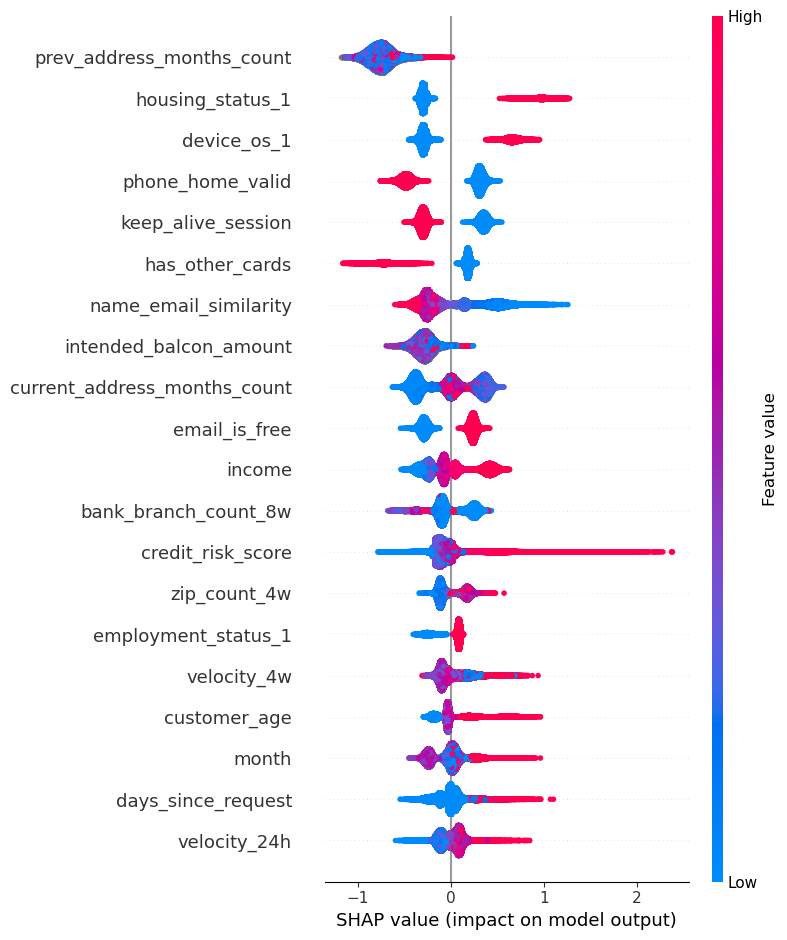

CPU times: total: 5min 30s
Wall time: 1min 49s


In [4]:
%%time
# Crear un objeto TreeExplainer con el modelo LGBM
explainer = shap.TreeExplainer(model)

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_test)

# Crear el gráfico de resumen
shap.summary_plot(shap_values[1], X_test)


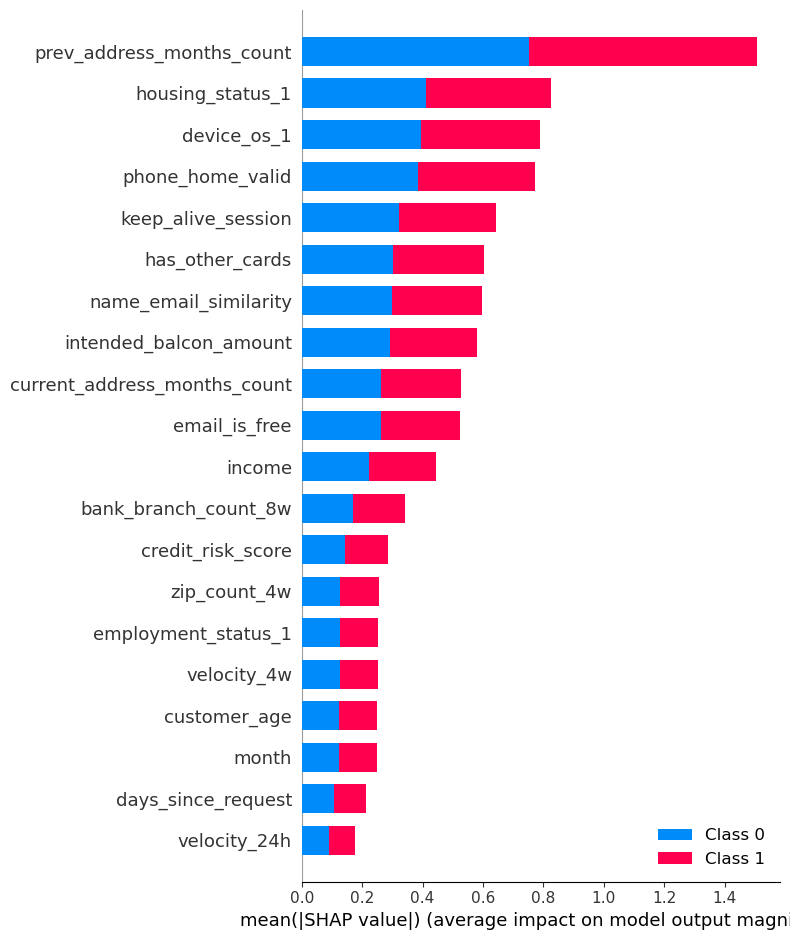

In [5]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

- Método SHAP

En primer lugar hemos decidio representar el método SHAP con un gráfico de Beeswarm. El gráfico generado es una visualización que muestra el impacto de las variables en las predicciones de un modelo, en este caso del LightGBM model, representando estos valores como puntos en un eje x, donde los valores negativos indican un impacto negativo, los valores cercanos a cero son neutrales y los valores positivos indican un impacto positivo.
Podemos observar como la variable `prev_adress_months_count` es la que mayor impacto tiene en las predicciones de nuestro modelo.

Esta variable  proporciona información sobre la duración en meses de la dirección anterior de un solicitante. En un contexto financiero o de evaluación de riesgos, esta característica podría ser relevante para entender el historial residencial de un individuo y cómo este historial afecta las decisiones del modelo. Por ejemplo, podríamos utilizar esta información para evaluar la estabilidad residencial de un solicitante, lo cual podría ser relevante para predecir comportamientos financieros o identificar, en nuestro caso, posibles fraudes.

Siguiendo con el análisis del gráfico Beeswarm y como está representada la variable que más impacto tiene en el modelo, nos damos cuenta de que la posición de los puntos cercanos a -1 en el eje x indica que los valores más bajos de prev_adress_month_count están asociados con un impacto negativo en las predicciones del modelo. Específicamente, cuando la duración en meses de la dirección anterior es cercana a -1, el modelo tiende a asignar una contribución negativa, sugiriendo que existe una menor estabilidad o continuidad en la dirección anterior y que podría estar relacionada con un mayor riesgo de fraude. También podemos diferenciar una acumulación de valores más altos de nuestra variable con más impacto cercanos al 0, esto significa que tiene un impacto neutro o cercano a cero en las predicciones del modelo.

Ya que en nuestra variable con más impacto no existe una influencia positiva en el modelo, podemos analizar la siguiente variable más importante `housing_status_1`, y es que en esta variable los valores más altos si que tienen un impacto positivo en nuestro modelo, esto significa que un housing_status_1 más alto disminuye la posibilidad de fraude.

En segundo lugar hemos hecho un gráfico de barras en el que cada barra representa el aporte de una característica específica para cada clase. La barra azul muestra la contribución de la característica de la clase 0 (no fraude) y la contribución de la clase 1 (fraude) se muestra en rojo.En este caso, la contribución de cada color se mantiene prácticamente igual en todas las barras, lo que significa que tanto si comete fraude o no, no es importante para observar la variable para hacer el modelo.

Además, está relacionada con la gráfica anterior ya que la longitud de la barra representa el impacto de esa variable en nuestro modelo y como podemos observar tienen el mismo orden en ambas gráficas. Volvemos a ver a la variable `prev_adress_months_count` siendo la más influyente, y en el último puesto a `velocity_24h`, que representa la velocidad de las solicitudes totales realizadas en las últimas 24 horas, es decir, el número promedio de solicitudes por hora en ese período de tiempo. 